In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/comprar_alquilar.csv")
datos.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
# Escalamos los datos
# El escalado es necesario para PCA ya que se basa en la varianza y magnitud de los datos
scaler = StandardScaler()
df = datos.drop(['comprar'], axis=1)  # Eliminamos la columna 'comprar' que es el objetivo y no debe ser escalada
scaler.fit(df)  # Ajustamos el escalador a los datos
X_Scaled = scaler.transform(df)  # Aplicamos la transformación a los datos

In [4]:
# Implementamos PCA con 9 componentes
pca = PCA(n_components=9)  # Especificamos que queremos 9 componentes principales
pca.fit(X_Scaled)  # Ajustamos el PCA a los datos escalados
X_pca = pca.transform(X_Scaled)  # Transformamos los datos originales a los componentes principales

In [5]:
# Mostrar los resultados de la varianza explicada
expl = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(expl):
    print(f"PC{i+1}: {var:.2%}")
print("Suma de varianza explicada en las primeras 5 componentes:", sum(expl[0:5]))

Varianza explicada por cada componente principal:
PC1: 29.91%
PC2: 23.29%
PC3: 11.71%
PC4: 10.69%
PC5: 9.64%
PC6: 5.63%
PC7: 4.15%
PC8: 3.02%
PC9: 1.97%
Suma de varianza explicada en las primeras 5 componentes: 0.8524062117714313


In [6]:
# Crear un DataFrame con los componentes principales
principal_columns = [f'Principal Component {i+1}' for i in range(X_pca.shape[1])]
principal_df = pd.DataFrame(data=X_pca, columns=principal_columns)

# Agregar la columna objetivo al DataFrame
principal_df['comprar'] = datos['comprar']

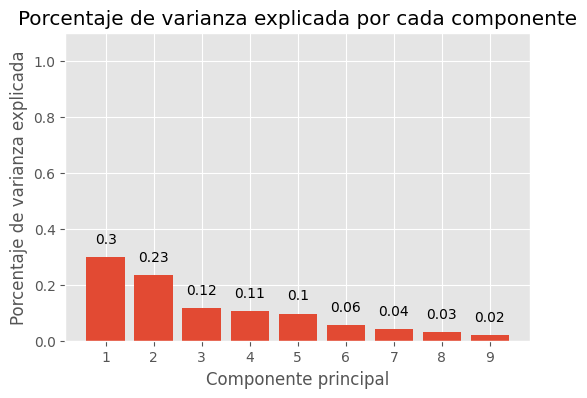

In [7]:
# Gráfica de la varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(pca.n_components_) + 1, height=pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada')
plt.show()

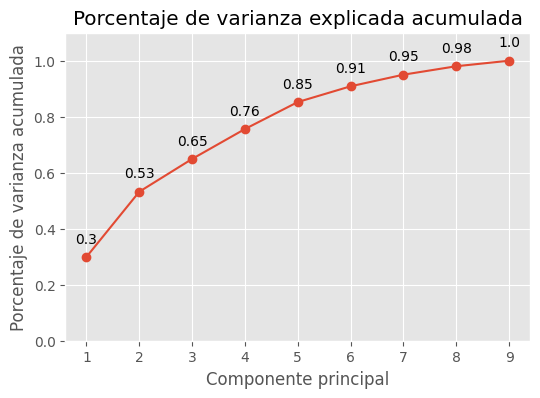

In [8]:
# Gráfica de la varianza acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df.columns)) + 1, prop_varianza_acum, marker='o')

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada')
plt.show()

In [9]:
# Escalado de los datos eliminando columnas categóricas
scaler = StandardScaler()
df2 = datos.drop(['comprar', 'estado_civil', 'hijos', 'trabajo'], axis=1)
scaler.fit(df2)
X_Scaled = scaler.transform(df2)

In [10]:
# Aplicación de PCA con 6 componentes principales
pca2 = PCA(n_components=6)
pca2.fit(X_Scaled)
X_pca2 = pca2.transform(X_Scaled)

In [11]:
# Resultados de la reducción a 6 componentes
expl = pca2.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(expl):
    print(f"PC{i+1}: {var:.2%}")
print("Suma de la varianza explicada por los primeros 5 componentes:", sum(expl[0:5]))

Varianza explicada por cada componente principal:
PC1: 42.70%
PC2: 17.21%
PC3: 16.03%
PC4: 14.39%
PC5: 6.69%
PC6: 2.98%
Suma de la varianza explicada por los primeros 5 componentes: 0.9701626349890449


In [12]:
# Creación de DataFrame con los componentes principales
principal_columns2 = [f'Principal Component {i+1}' for i in range(X_pca2.shape[1])]
principal_df2 = pd.DataFrame(data=X_pca2, columns=principal_columns2)

In [13]:
# Agregar la columna objetivo al DataFrame
principal_df2['comprar'] = datos['comprar']

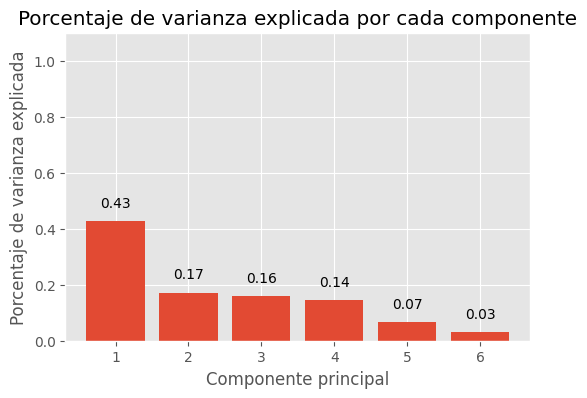

In [14]:
# Crear una gráfica de barras
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x=np.arange(pca2.n_components_) + 1,  # Eje X: Número de componente
    height=pca2.explained_variance_ratio_  # Eje Y: Porcentaje de varianza explicada por cada componente
)

# Añadir anotaciones en la gráfica para mostrar el valor exacto de cada barra
for x, y in zip(np.arange(len(df2.columns)) + 1, pca2.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,  # El valor a mostrar
        (x, y),  # Posición en la gráfica
        textcoords="offset points",
        xytext=(0, 10),  # Desplazamiento en Y de la anotación
        ha='center'  # Alinear el texto en el centro
    )

# Configuración de los ejes y el título de la gráfica
ax.set_xticks(np.arange(pca2.n_components_) + 1)  # Etiquetas en el eje X
ax.set_ylim(0, 1.1)  # Limitar el eje Y para que no sobrepase el 100%
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada')

plt.show()  # Mostrar la gráfica

In [15]:
prop_varianza_acum = pca2.explained_variance_ratio_.cumsum()

# Mostrar los valores calculados
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.42698481 0.59911895 0.75939032 0.90331034 0.97016263 1.        ]


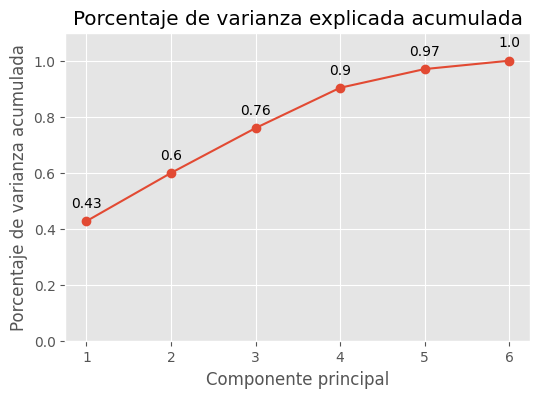

In [16]:
# Crear una gráfica de línea
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df2.columns)) + 1,  # Eje X: Número de componente
    prop_varianza_acum,  # Eje Y: Porcentaje de varianza acumulada
    marker='o'  # Marcador de puntos
)

# Añadir anotaciones en la gráfica para mostrar el valor exacto en cada punto
for x, y in zip(np.arange(len(df2.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,  # El valor a mostrar
        (x, y),  # Posición en la gráfica
        textcoords="offset points",
        xytext=(0, 10),  # Desplazamiento en Y de la anotación
        ha='center'  # Alinear el texto en el centro
    )

# Configuración de los ejes y el título de la gráfica
ax.set_ylim(0, 1.1)  # Limitar el eje Y para que no sobrepase el 100%
ax.set_xticks(np.arange(pca2.n_components_) + 1)  # Etiquetas en el eje X
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada')

plt.show()  # Mostrar la gráfica